In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
df.describe(include="all")

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [54]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [55]:
df.duplicated().sum()

np.int64(1)

In [56]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns

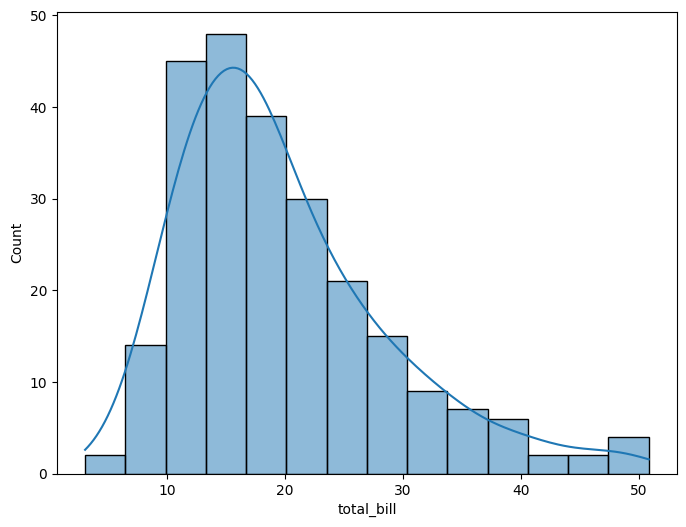

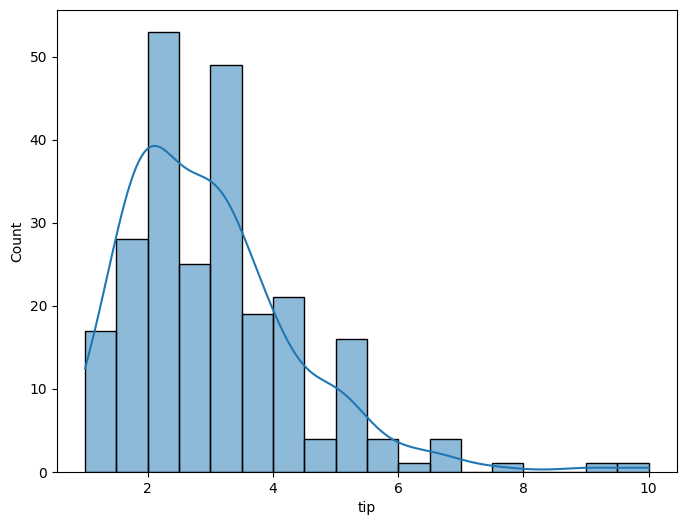

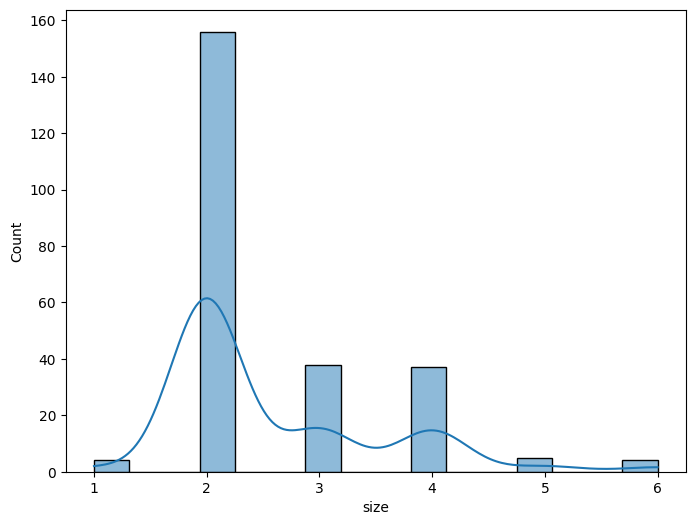

In [57]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True)
  plt.show()

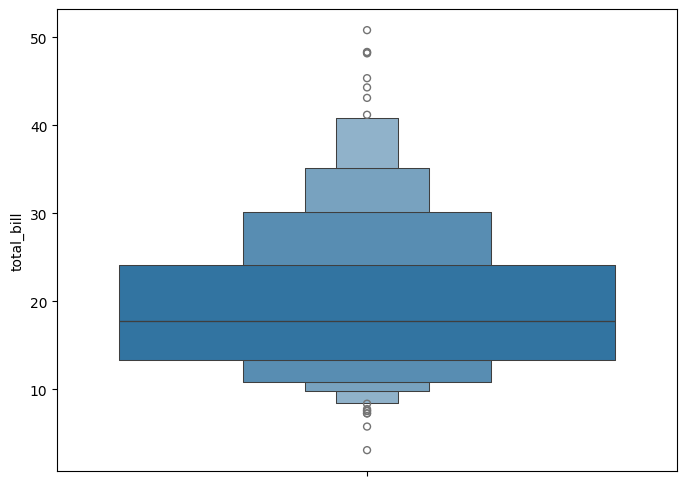

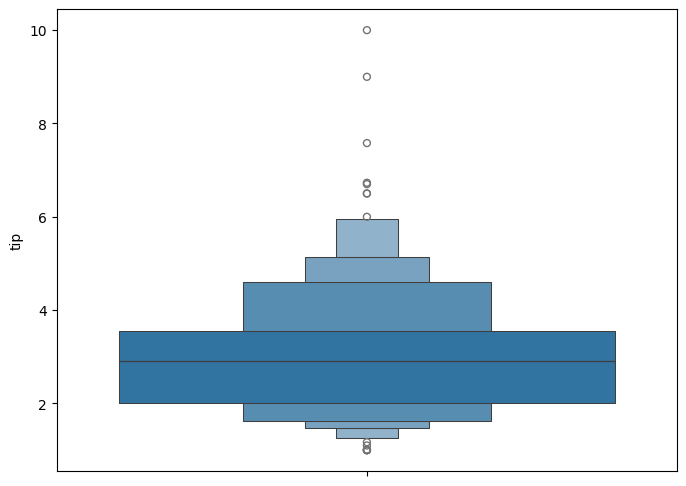

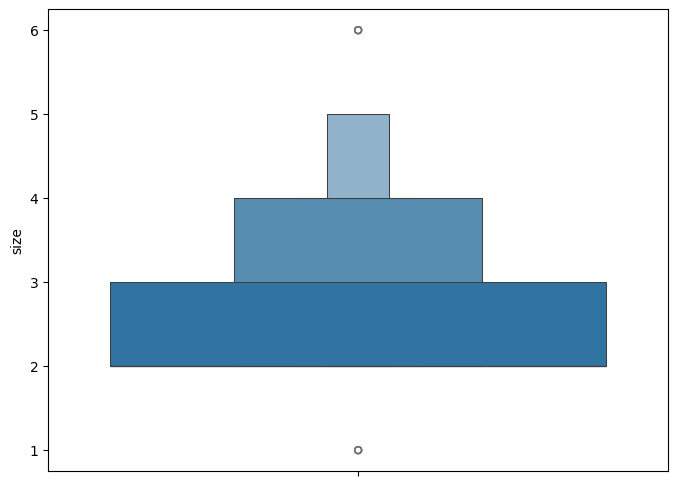

In [58]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(df[col])
  plt.show()

sex
Male      157
Female     87
Name: count, dtype: int64


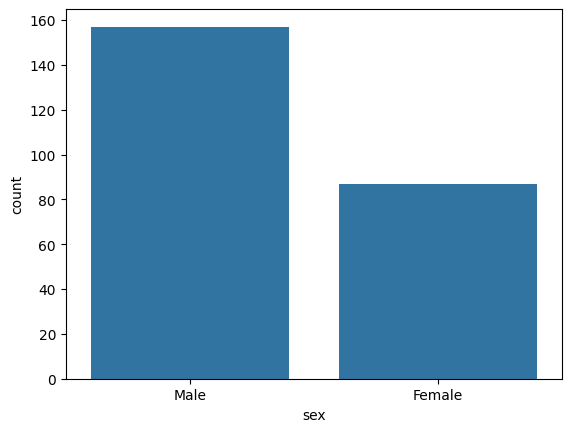

smoker
No     151
Yes     93
Name: count, dtype: int64


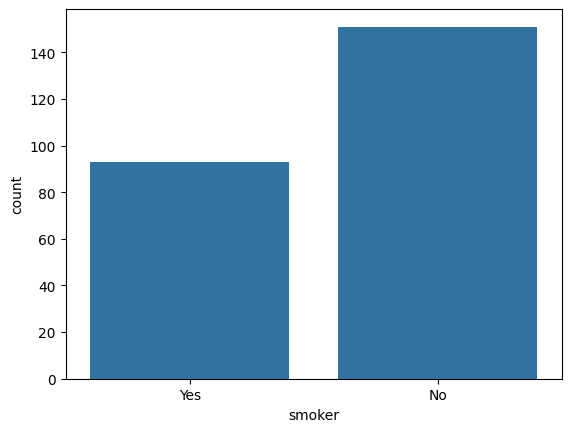

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


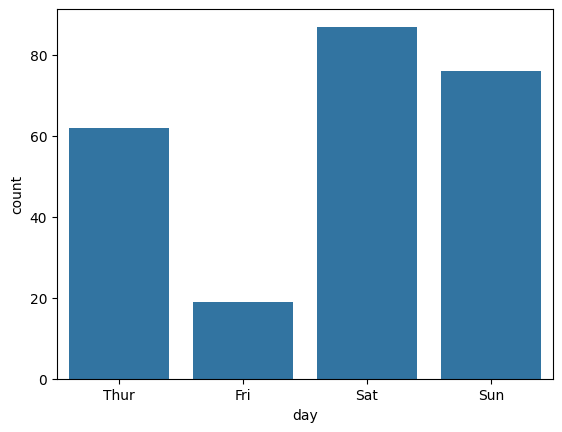

time
Dinner    176
Lunch      68
Name: count, dtype: int64


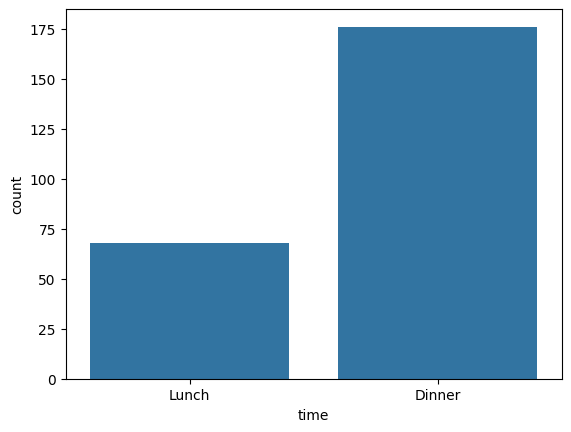

In [59]:
for col in categorical:
  print(df[col].value_counts())
  sns.countplot(x=col,data=df)
  plt.show()

<Axes: >

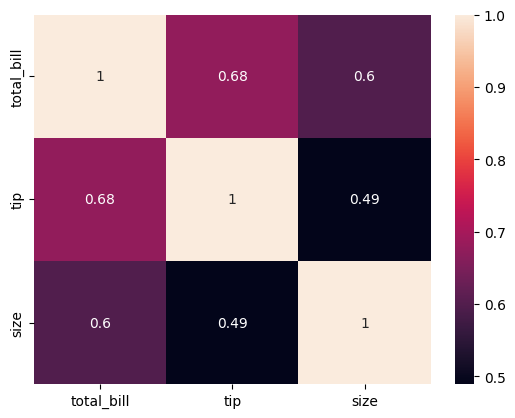

In [60]:
sns.heatmap(df[numerical].corr(),annot=True)

In [61]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [62]:
df.duplicated().sum()

np.int64(1)

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
hot_en = [col for col in categorical if len(df[col].unique())>2]
label_en = [col for col in categorical if len(df[col].unique())==2]

In [65]:
le = LabelEncoder()

for col in label_en:
  df[col] = le.fit_transform(df[col])

In [66]:
df = pd.get_dummies(df,columns=hot_en,drop_first=True)

In [67]:
X = df.drop("tip",axis=1)
y = df["tip"]

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [70]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)
y_pred

array([2.88980071, 2.00971754, 2.94645389, 2.11618362, 3.8880845 ,
       4.02028128, 4.18270865, 2.46277506, 2.52346767, 3.30734266,
       2.82351142, 3.92400132, 2.33074483, 5.69776425, 1.86874891,
       2.34224466, 3.94979849, 3.10474901, 2.58356249, 2.46013576,
       3.3679875 , 3.17174072, 2.75473828, 2.01189491, 3.66163804,
       2.6865428 , 2.13794136, 3.28624321, 2.4170365 , 4.42649618,
       1.58613352, 1.80504129, 3.13995978, 2.8778473 , 2.90350193,
       1.96540248, 3.37208729, 2.06885052, 2.42850722, 3.08129577,
       2.09395816, 2.12931829, 4.72534577, 2.33589779, 1.88333923,
       1.17668626, 4.39266625, 3.00419492, 4.59185475])

In [72]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [73]:
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)

Mean Squared Error: 1.1730028226689844
Root Mean Squared Error: 1.0830525484338165
R-squared: 0.5185656337107005
